In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Attrition', 'Gender', 'Department', 'EducationField', 'MaritalStatus', 'JobRole','BusinessTravel','Over18','OverTime'])

In [6]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,0,1,1,1,0


In [7]:
# Define features and target variable
X = df.drop(['Attrition_No', 'Attrition_Yes'], axis=1)  # Features
y = df['Attrition_Yes']  # Target variable (1 if the employee left, 0 otherwise)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


Confusion Matrix:
[[252   3]
 [ 35   4]]


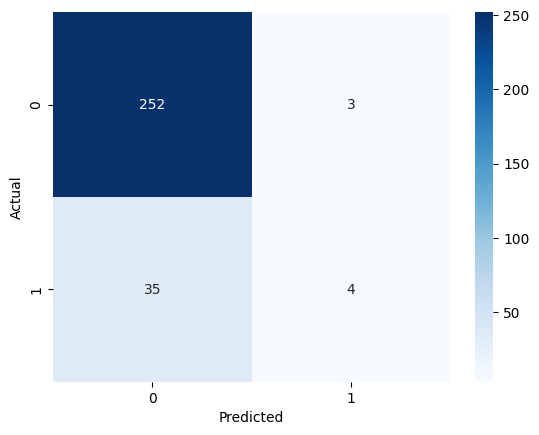

In [10]:
# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



In [12]:
# Feature Importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
sorted_features = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(sorted_features)

Feature Importance:
                                   Importance
MonthlyIncome                        0.071766
Age                                  0.049765
DailyRate                            0.045329
TotalWorkingYears                    0.043987
MonthlyRate                          0.043864
EmployeeNumber                       0.040967
YearsAtCompany                       0.039287
OverTime_No                          0.039182
DistanceFromHome                     0.038608
OverTime_Yes                         0.038148
HourlyRate                           0.038057
NumCompaniesWorked                   0.036229
YearsWithCurrManager                 0.031213
PercentSalaryHike                    0.028996
YearsInCurrentRole                   0.027202
StockOptionLevel                     0.025796
JobSatisfaction                      0.025442
YearsSinceLastPromotion              0.023893
EnvironmentSatisfaction              0.023627
JobLevel                             0.023066
MaritalStatus_

In [13]:
# Convert sorted_features to a Plotly DataFrame
plotly_features = sorted_features.reset_index()
# Create a horizontal bar chart
fig = px.bar(
    plotly_features,
    x='Importance',
    y='index',
    orientation='h',
    title='Feature Importance in Employee Turnover Prediction',
    labels={'Importance': 'Feature Importance', 'index': 'Features'},
    template='plotly_dark',  # You can choose different templates
)
# Customize layout
fig.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),  # Adjust margins
    xaxis=dict(title_text='Feature Importance', title_font=dict(size=16)),
    yaxis=dict(title_text='Features', title_font=dict(size=16)),
    font=dict(size=12, color='white'),  # Adjust font size and color
)
# Show the plot
fig.show()

In [14]:
# Convert sorted_features to a Plotly DataFrame
plotly_features = sorted_features.reset_index()
# Create a subplot with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Employee Attrition Rate", "Feature Importance", "Department Attrition Rate"),
                    specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "pie"}]])
# Bar chart for Employee Attrition Rate
plot_df = df['Attrition_Yes'].value_counts(normalize=True).mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index': 'Attrition'}, inplace=True)
plot_df['Attrition'] = ['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x = plot_df['Attrition']
y = plot_df['Percent']
# Create a Bar trace
bar_trace = go.Bar(
    x=x,
    y=y,
    text=y,
    opacity=.8,
    hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3f}%<extra></extra>',
    showlegend=False,
    marker=dict(
        color=['#FF595E', '#5A5A5A'],
        line=dict(width=1, color='#1F0202'),
    )
)
# Update Bar trace and layout
bar_trace.update(texttemplate='%{text:.3s}%', textposition='outside')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig.update_layout(yaxis_ticksuffix='%')
# Add Bar trace to subplot
fig.add_trace(bar_trace, row=1, col=1)
# Bar chart for Feature Importance
# Use the plotly DataFrame directly
bar_trace_feature = go.Bar(
    x=plotly_features['Importance'],
    y=plotly_features['index'],
    orientation='h',
    hovertemplate='Feature Importance<br>%{y}: %{x:.3f}%<extra></extra>',
    marker=dict(color='#CDBBA7'),
)
# Update Bar trace and layout for Feature Importance
fig.add_trace(bar_trace_feature, row=1, col=2)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig.update_layout(yaxis_ticksuffix='%')
# Pie chart for Department Attrition Rate
plot_df2 = df['Department_Research & Development'].value_counts(normalize=True).mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index': 'Department'}, inplace=True)
# Create a Pie trace
pie_trace = go.Pie(
    labels=plot_df2['Department'],
    values=plot_df2['Percent'],
    opacity=0.85,
    hole=0.4,
    hovertemplate='%{label}<br>Attrition Rate: %{value:.3f}%<extra></extra>',
    marker=dict(
        colors=['#587D65', '#ADC4B2', '#D1C9C2'],
        line=dict(color='#28221D', width=1),
    )
)
# Update Pie trace and layout for Department Attrition Rate
fig.add_trace(pie_trace, row=1, col=3)
fig.update_yaxes(tickmode='array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14, textfont_color='black')
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
# Show the plot
fig.show()

In [15]:
# Group by relevant columns
plot_df = df.groupby(['Gender_Female', 'Gender_Male', 'Department_Human Resources',
                      'Department_Research & Development', 'Department_Sales'])['Attrition_Yes'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
# Create the bar plot
fig = px.bar(plot_df, x="Department_Research & Development", y="Percent", color="Attrition_Yes",
             barmode="group", text='Percent', opacity=.75, facet_col="Gender_Female",
             category_orders={'Attrition_Yes': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34', 'No': '#CDBBA7'})

# Update trace and layout
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix='%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True, tickangle=30, col=2)
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
# Show the plot
fig.show()